##                     Gesture_Recognition_Case_Study  (Arunit Mukherjee,Subir Garg)

### Problem Statement

Imagine you are working as a data scientist at a home electronics company which manufactures state of the art smart
televisions. You want to develop a cool feature in the smart-TV that can recognise five different gestures performed by
the user which will help users control the TV without using a remote.

The gestures are continuously monitored by the webcam mounted on the TV. Each gesture corresponds to a specific command:

| Gesture | Corresponding Action |
| --- | --- | 
| Thumbs Up | Increase the volume. |
| Thumbs Down | Decrease the volume. |
| Left Swipe | 'Jump' backwards 10 seconds. |
| Right Swipe | 'Jump' forward 10 seconds. |
| Stop | Pause the movie. |

Each video is a sequence of 30 frames (or images).

### Objectives:

1. **Generator**:  The generator should be able to take a batch of videos as input without any error. Steps like
   cropping, resizing and normalization should be performed successfully.
   
   #### Please note that the code will work where two csv files;one for train and test has been created. Each entry in the csv table corresponds to the path of sub folders containing several images in sequence for each gesture. 

2. **Model**: Develop a model that is able to train without any errors which will be judged on the total number of
   parameters (as the inference(prediction) time should be less) and the accuracy achieved.

3. **Write up**: This should contain the detailed procedure followed in choosing the final model. The write up should
   start with the reason for choosing the base model, then highlight the reasons and metrics taken into consideration to
   modify and experiment to arrive at the final model.

#### Dataset:

The training data consists of a few hundred videos categorised into one of the five classes. Each video (typically 2-3
seconds long) is divided into a sequence of 30 frames(images). These videos have been recorded by various people
performing one of the five gestures in front of a webcam - similar to what the smart TV will use.
Note that all images in a particular video subfolder have the same dimensions but different videos may have different
dimensions. Specifically, videos have two types of dimensions - either 360x360 or 120x160 (depending on the webcam used
to record the videos).

### Two Architectures: 3D Convs-FC  and TimeDistributed 2D CNN-RNN-FC 

CONV 3D ARCHITECTURES

3D convolutions applies a 3 dimentional filter to the dataset and the filter moves 3-direction (x, y, z) to calcuate the low level feature representations. Their output shape is a 3 dimentional volume space such as cube or cuboid. They are helpful in event detection in videos, 3D medical images etc. They are not limited to 3d space but can also be applied to 2d space inputs such as images.
![image](https://user-images.githubusercontent.com/69101964/120886169-353b8d80-c60a-11eb-9556-91c4d9ca4be4.png)


When applied to video analysis problems,it is desirable to capture the motion information en-coded in multiple contiguous frames. To this end, wepropose to perform 3D convolutions in the convolutionstages of CNNs to compute features from both spa-tial and temporal dimensions. The 3D convolution isachieved by convolving a 3D kernel to the cube formedby stacking multiple contiguous frames together. Bythis construction, the feature maps in the convolutionlayer is connected to multiple contiguous frames in theprevious layer, thereby capturing motion information.A 3D convolutional kernel can only extractone type of features from the frame cube, since thekernel weights are replicated across the entire cube. Ageneral design principle of CNNs is that the numberof feature maps should be increased in late layers bygenerating multiple types of features from the sameset of lower-level feature maps.  Similar to the caseof 2D convolution, this can be achieved by applyingmultiple 3D convolutions with distinct kernels to the same location in the previous layer.
![image](https://user-images.githubusercontent.com/69101964/120886642-9e240500-c60c-11eb-93eb-49dc3824891b.png)
![image](https://user-images.githubusercontent.com/69101964/120886739-1c80a700-c60d-11eb-867f-c7d660f75ca9.png)

TIME DISTRIBUTED CONV2D LAYERS FEEDING INTO LSTM/GRU

Detecting an action is possible by analyzing a series of images that are taken in time. This is a very nice visualisation of the architecture
![image](https://user-images.githubusercontent.com/69101964/120886968-2ce55180-c60e-11eb-87e2-aef29e362e83.png)
We need to pass the sequences of images that creates a video file one after the other to the convolution layers to detect spatial features and then pass the feature vector to a LSTM/GRU layer to extract temporal features. This will help extract the spatiotemporal features of the video clip for classification. 'TimeDistributed layer apply the same layer to several inputs. And it produce one output per input to get the result in time'. 
![image](https://user-images.githubusercontent.com/69101964/120887172-fb20ba80-c60e-11eb-8a1e-295e674deeec.png)
We now need the network to use memory and enhance the prediction by taking advantage of LSTM. The same Conv2D layer is trained for all the images frames in time and feeds it into the LSTM/GRU layer to capture the temporal relations. 
![image](https://user-images.githubusercontent.com/69101964/120889068-23adb200-c619-11eb-95d3-32598f5d1a4f.png)

For more information on LSTM and GRUs refer to the following:
https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21



## General overview of program

<span style="color: green"> We create super class Model builder that is an Abstract base class and implements an abstract method to define models. This structure of code helps to create several models,to test the various accuracies without having to retype code. The usage becomes more compact. 

We use Abstract Base Class to create superclass 'Model Builder' that  will not allow other users to create 
objects of this super class. The abstract method decorator define_model forces the user to create this method whenever
the user instantiates any subclass inheriting this superclass. 
The benefits of using ABCMeta classes to create abstract classes is that your IDE and Pylint will 
indicate to you at development time whether your inheriting classes conform to the class definition 
that you've asked them to.

Abstract interfaces are not instantiated directly in your scripts, 
but instead implemented by subclasses that will provide the implementation code for 
the abstract interface methods. 
An abstract interface method is a method that is declared, but contains no implementation. 
The implementation happens at the class that inherits the abstract class.

We use 3 methods namely;initialize_path, initialize_image_properties,initialize_hyperparams to repeatedly
provide hyperparameters to our models for every model we create.
We initialize the number of image frame sequences and provide that to the method called generator.
The method generator is used to create multiple batches of data for training. 
Each video file has been converted to sequence of images. We read from the train csv file,and randomly select the image folders
and ask the generator method to create total number of batches based on our batch size. 

For each batch we call on the method one_batch_data that creates smaller sub-batches equal to batch-size 
and depending on the number of frames to sample hyperparameter it picks up sequences of images based on temporal stride given.
The sequence of images are then processed and augmented using open cv code. We resize the image to user-requested image shape
, as our data has two types of resolutions, and then normalize them. We use matrix transformations both linear and rotational 
using warp_affine transformations where a matrix is multiplied to shift or rotate our image and then we crop out the dark portions
If the user desires augmentation we double our train data that is being generated. Augmentation minimizes overfitting

One_batch_method is a method and returns sub-batches and labels for each batch iteration to the generator which yields these
to the train_model method. This method accepts the user defined model as a parameter and uses the fit generator keras
method to train our model using our custom generator method. Keras callbacks using Model_checkpoint and LRonPLateau
also have been used to save our model checkpoints for easy model saving for later use. Whenever there is validation loss
improvement the model creates a .h5 model which can be reused later. The learning rate is reduced whenever these is no 
improvement in validation loss. </span>

#### Data Preprocessing

We can apply several of the image procesing techniques for each of image in the frame.

#### Cropping
We use our 'model_builder' class to set the image shape as desired by the user, this will transform all images to the same dimension. Also the training time is affected.

#### Normalization

We will use mean normaliztion for each of the channel in the image.

#### Data Agumentation

We have a total of 600+ for test set and 100 sampels for validation set. We will increase this 2 fold by usign a simple
agumentiaton technique of affine transforamtion.

#### Affine Transformation

The cv2.warpAffine() function mainly uses the transformation matrix M to transform the image such as rotation, affine, translation, etc. We only need to provide a 2*3 transformation matrix M to transform the image. It is generally used together with the two functions cv2.getRotationMatrix2D and cv.GetAffineTransform. These two functions are used to obtain the transformation matrix M, so that we don’t need to set M ourselves.
Refer to the below link for good examples of opencv transformations
https://towardsdatascience.com/transformations-with-opencv-ff9a7bea7f8b



#### Generators
##### Reading Video as Frames

We use 3 methods namely;initialize_path, initialize_image_properties,initialize_hyperparams to repeatedly
provide hyperparameters to our models for every model we create.
We initialize the number of image frame sequences and provide that to the method called generator.
The method generator is used to create multiple batches of data for training. 
Each video file has been converted to sequence of images. We read from the train csv file,and randomly select the image folders
and ask the generator method to create total number of batches based on our batch size. 

For each batch we call on the method one_batch_data that creates smaller sub-batches equal to batch-size 
and depending on the number of frames to sample hyperparameter it picks up sequences of images based on temporal stride given.
The sequence of images are then processed and augmented using open cv code. We resize the image to user-requested image shape
, as our data has two types of resolutions, and then normalize them. We use matrix transformations both linear and rotational 
using warp_affine transformations where a matrix is multiplied to shift or rotate our image and then we crop out the dark portions
If the user desires augmentation we double our train data that is being generated. Augmentation minimizes overfitting

One_batch_method is a method and returns sub-batches and labels for each batch iteration to the generator which yields these
to the train_model method. This method accepts the user defined model as a parameter and uses the fit generator keras
method to train our model using our custom generator method. Keras callbacks using Model_checkpoint and LRonPLateau
also have been used to save our model checkpoints for easy model saving for later use. Whenever there is validation loss
improvement the model creates a .h5 model which can be reused later. The learning rate is reduced whenever these is no 
improvement in validation loss

'The image generator yields (N, W, H, C) data, where N is the batch size, W and H are width and height, and C is the number of channels (3 for RGB, 1 for grayscaled images).
But we need to send a sequence, we need to send several frames. The needed shape is (N, F, W, H, C) — where F is the number of frames for our sequence. For example, if we train a sequence of 5 images that are RBG and with 112x112 size, the shape should be (N, 5, 112, 112, 3).
The image data generator from Keras cannot produce such a format.' ### Luckily our dataset has same number of frames and the main action has been captured across these frames.



##### Implementation

  Testing of different combinations of batch-size, number of image frames and resolution to reach max GPU performance before OOM is done.
  Results:
  -  We see that that GPU gives OOM error beyond 20 frames and batch size of 20 for a resolution of 160*160.   We will reduce image resolution
  -  For my system RTX-2060 with 8gb of vram the max params are: batch size=40, 25 frames and res of 100*100. For a resolution of 160x160 we might have to reduce batch size.
  
  We find the following by testing few epochs on a CONV 3D model:
  
  
   Inferences:

  - More training time: increase frames, increase resolution
  - No effect on training time: batch size change
  - OOM error of VRAM: increase in batch size



#### The following are the dependencies in the environment we used. In case of some module import error please check these.

absl-py==0.12.0
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
backcall==0.2.0
bleach @ file:///tmp/build/80754af9/bleach_1612211392645/work
cachetools==4.2.2
certifi==2021.5.30
cffi @ file:///C:/ci/cffi_1613247279197/work
chardet==4.0.0
click==8.0.1
colorama==0.4.4
cycler==0.10.0
decorator==4.4.2
defusedxml @ file:///tmp/build/80754af9/defusedxml_1615228127516/work
entrypoints==0.3
flatbuffers==1.12
gast==0.3.3
google-auth==1.30.1
google-auth-oauthlib==0.4.4
google-pasta==0.2.0
grpcio==1.32.0
h5py==2.10.0
idna==2.10
imageio==2.9.0
importlib-metadata @ file:///C:/ci/importlib-metadata_1617877484576/work
ipykernel==5.5.3
ipython==7.22.0
ipython-genutils==0.2.0
jedi==0.18.0
Jinja2 @ file:///tmp/build/80754af9/jinja2_1621238361758/work
joblib==1.0.1
jsonschema @ file:///tmp/build/80754af9/jsonschema_1602607155483/work
jupyter-client==6.1.12
jupyter-core==4.7.1
jupyterlab-pygments @ file:///tmp/build/80754af9/jupyterlab_pygments_1601490720602/work
Keras==2.4.3
Keras-Preprocessing==1.1.2
kiwisolver==1.3.1
Markdown==3.3.4
MarkupSafe @ file:///C:/ci/markupsafe_1621528314575/work
matplotlib==3.4.2
mistune==0.8.4
nbclient @ file:///tmp/build/80754af9/nbclient_1614364831625/work
nbconvert @ file:///C:/ci/nbconvert_1601914925608/work
nbformat @ file:///tmp/build/80754af9/nbformat_1617383369282/work
nest-asyncio @ file:///tmp/build/80754af9/nest-asyncio_1613680548246/work
networkx==2.5.1
nltk==3.6.2
notebook @ file:///C:/ci/notebook_1621528634641/work
numpy==1.19.5
oauthlib==3.1.1
opencv-python==4.5.2.52
opt-einsum==3.3.0
packaging @ file:///tmp/build/80754af9/packaging_1611952188834/work
pandas==1.2.4
pandocfilters @ file:///C:/ci/pandocfilters_1605102497129/work
parso==0.8.2
pickleshare==0.7.5
Pillow==8.2.0
prometheus-client @ file:///tmp/build/80754af9/prometheus_client_1618088486455/work
prompt-toolkit==3.0.18
protobuf==3.17.2
pyasn1==0.4.8
pyasn1-modules==0.2.8
pycparser @ file:///tmp/build/80754af9/pycparser_1594388511720/work
Pygments==2.8.1
pyparsing @ file:///home/linux1/recipes/ci/pyparsing_1610983426697/work
pyrsistent @ file:///C:/ci/pyrsistent_1600141795814/work
python-dateutil==2.8.1
pytz==2021.1
PyWavelets==1.1.1
pywin32==300
pywinpty==0.5.7
PyYAML==5.4.1
pyzmq==22.0.3
regex==2021.4.4
requests==2.25.1
requests-oauthlib==1.3.0
rsa==4.7.2
scikit-image==0.18.1
scikit-learn==0.24.2
scipy==1.6.3
seaborn==0.11.1
Send2Trash @ file:///tmp/build/80754af9/send2trash_1607525499227/work
six==1.15.0
sklearn==0.0
tensorboard==2.5.0
tensorboard-data-server==0.6.1
tensorboard-plugin-wit==1.8.0
tensorflow==2.4.1
tensorflow-estimator==2.4.0
termcolor==1.1.0
terminado==0.9.4
testpath @ file:///home/ktietz/src/ci/testpath_1611930608132/work
threadpoolctl==2.1.0
tifffile==2021.4.8
tornado==6.1
tqdm==4.61.0
traitlets==5.0.5
typing-extensions==3.7.4.3
urllib3==1.26.5
wcwidth==0.2.5
webencodings==0.5.1
Werkzeug==2.0.1
wincertstore==0.2
wrapt==1.12.1
zipp @ file:///tmp/build/80754af9/zipp_1615904174917/work

In [2]:
import numpy as np
import random as rn
from skimage.transform import resize
from skimage.io import imread
import os
import cv2
import datetime
import os
from PIL import Image, ImageFilter, ImageEnhance
import matplotlib.pyplot as plt
import abc
import pandas as pd
from keras.models import load_model
from keras.utils import plot_model
import pickle

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
np.random.seed(30)
import random as rn
rn.seed(30)

import tensorflow as tf
tf.random.set_seed(30)

In [4]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, GlobalAveragePooling2D,ConvLSTM2D, LSTM
from keras.layers.convolutional import Conv3D, MaxPooling3D, Conv2D, MaxPooling2D 
from keras.layers.recurrent import LSTM
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.layers import Dropout

In [5]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)  # to prevent OOM error

In [6]:
physical_devices  # checking GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
project_folder='Project_data'

In [11]:
#the following code will only work if the project data folder is present in current working directory. 
# Please uncomment if you want to train the model again and not use the provided .h5 file
 

# train_doc = np.random.permutation(open('Project_data/train.csv').readlines())
# val_doc = np.random.permutation(open('Project_data/val.csv').readlines())
# batch_size = 10 #experiment with the batch size

In [12]:
# code to create a dataframe to visual all the classes present
# please uncomment if you want to visualize the loaded data

# train_df = pd.DataFrame()
# frame_name = []
# frame_target = []
# frame_class = []


# for train_data in train_doc:
#     data = train_data.split(";")
#     frame_name.append(data[0])
#     frame_target.append(data[1])
#     frame_class.append(data[2].strip())
   
# train_df["Video_Name"] = frame_name
# train_df["Action_name"] = frame_target
# train_df["Action_Class"] = frame_class

In [13]:
# train_df.head(15)

,Video_Name,Action_name,Action_Class
0,WIN_20180926_16_54_08_Pro_Right_Swipe_new,Right_Swipe_new,1
1,WIN_20180925_18_02_58_Pro_Thumbs_Down_new,Thumbs_Down_new,3
2,WIN_20180925_17_33_08_Pro_Left_Swipe_new,Left_Swipe_new,0
3,WIN_20180925_17_51_17_Pro_Thumbs_Up_new,Thumbs_Up_new,4
4,WIN_20180926_17_17_35_Pro_Left_Swipe_new,Left_Swipe_new,0
5,WIN_20180926_17_30_47_Pro_Thumbs_Up_new,Thumbs_Up_new,4
6,WIN_20180926_17_29_23_Pro_Stop_new,Stop_new,2
7,WIN_20180926_17_12_26_Pro_Thumbs_Up_new,Thumbs_Up_new,4
8,WIN_20180926_17_29_01_Pro_Stop_new,Stop_new,2
9,WIN_20180907_16_32_11_Pro_Stop Gesture_new,Stop Gesture_new,2


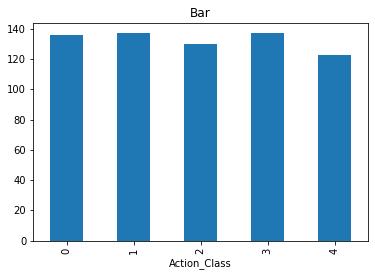

In [14]:
# We will check the class distribution for imbalance 

# plt.title('Bar')
# train_df.groupby('Action_Class').Action_name.count().plot(kind='bar') 
# plt.show()


#### We see that our classes is  almost balanced

###  Helper functions:


##### Creating a function to display model results as a dataframe

In [18]:
model_detail_df = pd.DataFrame()

In [19]:
def model_result(model_name ,accuracy, loss, val_accuracy, val_loss):
    model_detail_dic = {"Model Name" : model_name,
                   "Model Accuracy" : accuracy * 100,
                   "Model Loss" : loss * 100 ,
                   "Val Accuracy" : val_accuracy * 100,
                   "Val Loss" : val_loss * 100}

    df = pd.DataFrame([model_detail_dic])
    return df

##### Creating a function to plot the model accuracies and loss

In [20]:
def plot(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    axes[0].plot(history.history['loss'])   
    axes[0].plot(history.history['val_loss'])
    axes[0].legend(['loss','val_loss'])
    axes[0].set_title('loss')

    axes[1].plot(history.history['categorical_accuracy'])   
    axes[1].plot(history.history['val_categorical_accuracy'])
    axes[1].legend(['categorical_accuracy','val_categorical_accuracy'])
    axes[1].set_title('accuracy')


## General overview of program

<span style="color: green"> We create super class Model builder that is an Abstract base class and implements an abstract method to define models. This structure of code helps to create several models,to test the various accuracies without having to retype code. The usage becomes more compact. 

We use Abstract Base Class to create superclass 'Model Builder' that  will not allow other users to create 
objects of this super class. The abstract method decorator define_model forces the user to create this method whenever
the user instantiates any subclass inheriting this superclass. 
The benefits of using ABCMeta classes to create abstract classes is that your IDE and Pylint will 
indicate to you at development time whether your inheriting classes conform to the class definition 
that you've asked them to.

Abstract interfaces are not instantiated directly in your scripts, 
but instead implemented by subclasses that will provide the implementation code for 
the abstract interface methods. 
An abstract interface method is a method that is declared, but contains no implementation. 
The implementation happens at the class that inherits the abstract class.

We use 3 methods namely;initialize_path, initialize_image_properties,initialize_hyperparams to repeatedly
provide hyperparameters to our models for every model we create.
We initialize the number of image frame sequences and provide that to the method called generator.
The method generator is used to create multiple batches of data for training. 
Each video file has been converted to sequence of images. We read from the train csv file,and randomly select the image folders
and ask the generator method to create total number of batches based on our batch size. 

For each batch we call on the method one_batch_data that creates smaller sub-batches equal to batch-size 
and depending on the number of frames to sample hyperparameter it picks up sequences of images based on temporal stride given.
The sequence of images are then processed and augmented using open cv code. We resize the image to user-requested image shape
, as our data has two types of resolutions, and then normalize them. We use matrix transformations both linear and rotational 
using warp_affine transformations where a matrix is multiplied to shift or rotate our image and then we crop out the dark portions
If the user desires augmentation we double our train data that is being generated. Augmentation minimizes overfitting

One_batch_method is a method and returns sub-batches and labels for each batch iteration to the generator which yields these
to the train_model method. This method accepts the user defined model as a parameter and uses the fit generator keras
method to train our model using our custom generator method. Keras callbacks using Model_checkpoint and LRonPLateau
also have been used to save our model checkpoints for easy model saving for later use. Whenever there is validation loss
improvement the model creates a .h5 model which can be reused later. The learning rate is reduced whenever these is no 
improvement in validation loss. </span>

#### We built convolution 3d models testing different combinations of batch size- number of frames and image resolutions. We got the following results
#####  For the same batch and frames, image resolution increases our training time
### Inferences:
##### More training time:   increase frames, increase resolution
##### No effect on training time:  batch size change
##### OOM error of VRAM:   increase in batch size

##### We were also getting a overfitting model so data augmentation was necessary



#### We have  taken the generator code from started code provided and modified it

### Model Building

#### The generator code follows a modular design and has been adopted from keras custom generator style. This makes the code easily adaptable.

In [8]:
##### You can uncomment all print statements to understand code functionality



class ModelBuilderMoreAugmentation(metaclass= abc.ABCMeta):  # creating abstract base class 
    
    
    # It accepts the data path and creates instances of train and val data that can 
    # be used by other methods to read data
    
    def initialize_path(self,project_folder):
        self.train_doc = np.random.permutation(open(project_folder + '/' + 'train.csv').readlines())
        self.val_doc = np.random.permutation(open(project_folder + '/' + 'val.csv').readlines())
        self.train_path = project_folder + '/' + 'train'
        self.val_path =  project_folder + '/' + 'val'
        self.num_train_sequences = len(self.train_doc)  # instantiates the lengths of train and val dataset
        self.num_val_sequences = len(self.val_doc)
        
    # This method creates instances of image hyperparameters that our model object receives as user-parameters later
    
    def initialize_image_properties(self,image_height=100,image_width=100):
        self.image_height=image_height
        self.image_width=image_width
        self.channels=3  #RGB
        self.num_classes=5  # Total classes to predict
        self.total_frames=30 # total frames  
          
    def initialize_hyperparams(self,frames_to_sample=30,batch_size=20,num_epochs=20):
        self.frames_to_sample=frames_to_sample   # All these hyperparameters can be easily tweaked when model object calls this method
        self.batch_size=batch_size    # crucial parameter to prevent OOM of VRAM
        self.num_epochs=num_epochs
        
        
    def generator(self,source_path, folder_list, augment=False):
#         print('---------Inside generator---------')
#         print(np.linspace(0,self.total_frames-1,self.frames_to_sample))
        img_idx = np.round(np.linspace(0,self.total_frames-1,self.frames_to_sample)).astype(int) # calculate all the frames as requested according to stride
#         print(img_idx)
        batch_size=self.batch_size
        while True:
            t = np.random.permutation(folder_list)              # random ordering of all the video folders
#             print(f't is {t.shape} in size as is {t}')
            num_batches = len(t)//batch_size         # total batches.           
#             print(f'num batches are {num_batches}')
            for batch in range(num_batches): 
#                 print(f'batch number is {batch}')
                
                batch_data, batch_labels= self.one_batch_data(source_path,t,batch,batch_size,img_idx,augment) # calls the method below to return one batch of data
                yield batch_data, batch_labels  # generator yields to train_model method below    
#                 print(f'end of batch {batch}')
            remaining_seq=len(t)%batch_size    # if the total dataset length is not fully divisible by batch size
#             print(f'remaining seq is {remaining_seq}')
        
            if (remaining_seq != 0):  # we send the remaining number of images to the one batch method instead of the total batch size
                batch_data, batch_labels= self.one_batch_data(source_path,t,num_batches,batch_size,img_idx,augment,remaining_seq)
                yield batch_data, batch_labels 
    
    
    def one_batch_data(self,source_path,t,batch,batch_size,img_idx,augment,remaining_seq=0):
#         print('-------inside one batch data-------')
        seq_len = remaining_seq if remaining_seq else batch_size  # either batch_size or the remaining few images
#         print(f'seq length is {seq_len}')
         
        # We will create an empty array of batch_data to hold our train_batches. Shape is 
        #     [Batch_Size/last few images * frames * image(L*B) * RBG]
        # It is an array/tensor of 5 dimensions
        
        batch_data = np.zeros((seq_len,len(img_idx),self.image_height,self.image_width,self.channels))  
#         print(f'batch data tensor is {batch_data.shape}')
        batch_labels = np.zeros((seq_len,self.num_classes))  # batch labels of (batchsize*5) is created for onehot encoding
        
    
        if (augment): batch_data_aug = np.zeros((seq_len,len(img_idx),self.image_height,self.image_width,self.channels))
        
        
        for folder in range(seq_len):  # iterating through batch size of each batch.
#             print(f'this is folder {folder} in {seq_len}')
#             print(f'batch*batch_size is {batch*batch_size}')
#             print(f'folder + is{folder + (batch*batch_size)}')
#             print( t[folder + (batch*batch_size)].split(';'))
            imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # takes the jpg image from csv
#             print(f'images are  {imgs}')
            for idx,item in enumerate(img_idx): # iterating through each frame index in sequence
#                 print(f'img_idx are {img_idx}')
#                 print(f'idx is {idx} item is {item}')
#                 print(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/')
#                 print(imgs[item])
                # this code reads each image in the directory path and stores as an array
                image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
#                 print(f'image shape raw is {image.shape}')
                image_resized=resize(image,(self.image_height,self.image_width,3)) # reshaping the image as desired by user
            

                batch_data[folder,idx,:,:,0] = (image_resized[:,:,0])/255   # normalization is performed across all the 3 color channels
                batch_data[folder,idx,:,:,1] = (image_resized[:,:,1])/255
                batch_data[folder,idx,:,:,2] = (image_resized[:,:,2])/255
            
                if (augment):  # if augmentation is desired
#                     print(f'before augment')
#                     plt.imshow(image_resized)
#                     plt.show()
                    shifted = cv2.warpAffine(image, 
                                             np.float32([[1, 0, np.random.randint(-30,30)],[0, 1, np.random.randint(-30,30)]]), 
                                            (image.shape[1], image.shape[0]))
    
                    #The cv2.warpAffine() function mainly uses the transformation matrix M to 
                    #transform the image such as rotation, affine, translation, etc. 
                    #We only need to provide a 2*3 transformation matrix M to transform the image. 
                    #It is generally used together with the two functions cv2.getRotationMatrix2D and cv.GetAffineTransform. 
                    #These two functions are used to obtain the transformation matrix M, so that we don’t need to set M ourselves.
    
#                     print(f'shifted shape {shifted}')
#                     plt.imshow(shifted)
#                     plt.show()
                
                   
        
                    
                     #translation matrix
                    gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY) # this converts image to grayscale
#                     plt.imshow(gray,cmap='gray')
#                     plt.show()
#                     print(gray.shape)
#                     print(f'gray is {gray}')
                    x0, y0 = np.argwhere(gray > 0).min(axis=0)  # we create start-end points wherever the image is not black
#                     print(f'min coord {x0,y0}')
                    x1, y1 = np.argwhere(gray > 0).max(axis=0)  # we crop the shifted image to remove the black borders
#                     print(f'max coord {x1,y1}')
                    
                    cropped=shifted[x0:x1,y0:y1,:]
                    
                    
                    image_resized=resize(cropped,(self.image_height,self.image_width,3)) # we again resize the cropped image back to user-defined values
#                     print('cropped resized image is')
#                     plt.imshow(image_resized,cmap='gray')
#                     plt.show()
                    
                    #shifted = cv2.warpAffine(image_resized, 
                    #                        np.float32([[1, 0, np.random.randint(-3,3)],[0, 1, np.random.randint(-3,3)]]), 
                    #                        (image_resized.shape[1], image_resized.shape[0]))
            
                    batch_data_aug[folder,idx,:,:,0] = (image_resized[:,:,0])/255   # normalizing augmented data
                    batch_data_aug[folder,idx,:,:,1] = (image_resized[:,:,1])/255
                    batch_data_aug[folder,idx,:,:,2] = (image_resized[:,:,2])/255
                
            
            batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1  # one-hot encoding 
            
    
        if (augment):
            batch_data=np.concatenate([batch_data,batch_data_aug])    # doubling dataset if augment is True by user
            batch_labels=np.concatenate([batch_labels,batch_labels])

        
        return(batch_data,batch_labels)
    
    
    def train_model(self, model, augment_data=False):
        train_generator = self.generator(self.train_path, self.train_doc,augment=augment_data) # calling generator method to get training_batch
        val_generator = self.generator(self.val_path, self.val_doc) # same for validation data

        
        # we will create a folder naming it by time of creation to store all model checkpoints
        
        model_name = 'model_init' + '_' + str(datetime.datetime.now()).replace(' ','').replace(':','_') + '/'
    
        if not os.path.exists(model_name):
            os.mkdir(model_name)
        
        
        # using keras callbacks to create checkpoints where val_loss is reducing for all epochs and save it as .h5 file
        # we also use keras callbacks that reduces Learning rate when there is no improvement is val_loss
        
        filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

        checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
        LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=1, patience=4)
        callbacks_list = [checkpoint, LR]

        # we tell keras fit_generator method how many steps/batches are required per epoch. Each epoch runs run through the entire dataset 
        
        
        if (self.num_train_sequences%self.batch_size) == 0:
            steps_per_epoch = int(self.num_train_sequences/self.batch_size)
        else:
            steps_per_epoch = (self.num_train_sequences//self.batch_size) + 1

        if (self.num_val_sequences%self.batch_size) == 0:
            validation_steps = int(self.num_val_sequences/self.batch_size)
        else:
            validation_steps = (self.num_val_sequences//self.batch_size) + 1
    
        history=model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=self.num_epochs, verbose=1, 
                            callbacks=callbacks_list, validation_data=val_generator, 
                            validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)
        return history

        
    @abc.abstractmethod
    def define_model(self):      # defining abstract class method to be called by any subclass that uses this super-class
        pass

#### Several models were tried for better accuracies by changing both model architechtures and hyperparameters. They are summarized below. Our  aim was to keep the model size small so as to fit in a raspberry pi or a jetson nano to run a webcam

### Model 1

####  The Conv3D model structure:
- 4 X Conv3D + FC layers. 
-   Convolution layers have increasing number of units (8,16,32,64). They have equal kernel size (3x3x3).
-   Relu activation. 
-   Batch Normalization layer
-   Maxpooling3d layer of size (2x2x2)
- Flatten Layer
- 2X Fully connected Dense layer (64 units) with relu activation+Dropout(0.5)+Batch Normalization
- Softmax output layer
- adam optimizer

#### Hyperparameters:
-  Resolution:     160x160
-  frames:         16
-  batch_size:     10
-  epochs:         30 





#### Results:
-    Training Loss:         0.775
-    Training accuracy:     71.8%
-    Validation Loss:       0.579
-    Validation accuracy:   77.9%
-    Model Size:            5.9 MB

##### Conclusions:  The model plateaus to a validation accuracy of  close to 78% whereas the training accuracy is quite low; partly due to dropouts. It also implies, the network is not able to pick up all the details.

### Model 2

####  The Conv3D model structure:
- 4 X Conv3D + FC layers. 
-   Convolution layers have increasing number of units (8,16,32,64). They have equal kernel size (3x3x3).
-   Relu activation. 
-   Batch Normalization layer
-   Maxpooling3d layer of size (2x2x2)
- Flatten Layer
- 2X Fully connected Dense layer (256 units) with relu activation +Dropout(0.25)+Batch Normalization
- Softmax output layer
- adam optimizer

#### Hyperparameters:
-  Resolution:160x160
-  frames:16
-  batch_size:10
-  epochs: 15





#### Results:
-    Training Loss:         0.392
-    Training accuracy:     86.05%
-    Validation Loss:       0.63
-    Validation accuracy:   81.9%
-    Model Size:            21 MB

##### Conclusions:  The model plateaus to a validation accuracy of  close to 86% and the training accuracy is 82% after only 15 epochs. From the plot we see the validation accuracy still has a scope of improvement. An increase in the number of dense units to 256 and reducing dropouts have helped increase the training accuracy.
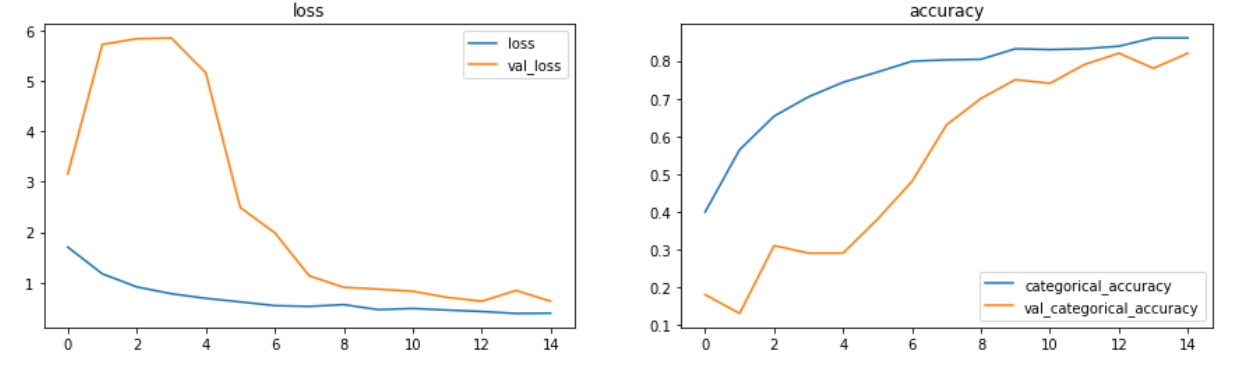

### Model 3

####  The Time distributed Conv2D+GRU  model structure:
- 4 X TimeDistributed CONV2D + GRU + FC layers. 
-   2D Convolution layers have increasing number of units (8,16,32,64). 1st and 2nd layer kernel size (3x3). 3rd       and 4th have kernel size (2x2)
-   Relu activation. 
-   Batch Normalization layer
-   Maxpooling2d layer of size (2x2)
- Time distributed Flatten Layer
- GRU layer (256 units) with dropout (0.25)
- 1 Fully connected Dense layer (256 units) with relu activation +Dropout(0.25)
- Softmax output layer
- adam optimizer

#### Hyperparameters:
-  Resolution:160x160
-  frames:16
-  batch_size:20
-  epochs: 30





#### Results:
-    Training Loss:         0.117
-    Training accuracy:     97.06%
-    Validation Loss:       0.47
-    Validation accuracy:   85%
-    Model Size:            61 MB

##### Conclusions:  The model plateaus to a validation accuracy of  close to 97% and the training accuracy is 85% after 30 epochs. Time distributed layer of CONV 2D is giving a higher training accuracy than CONV3D layers.
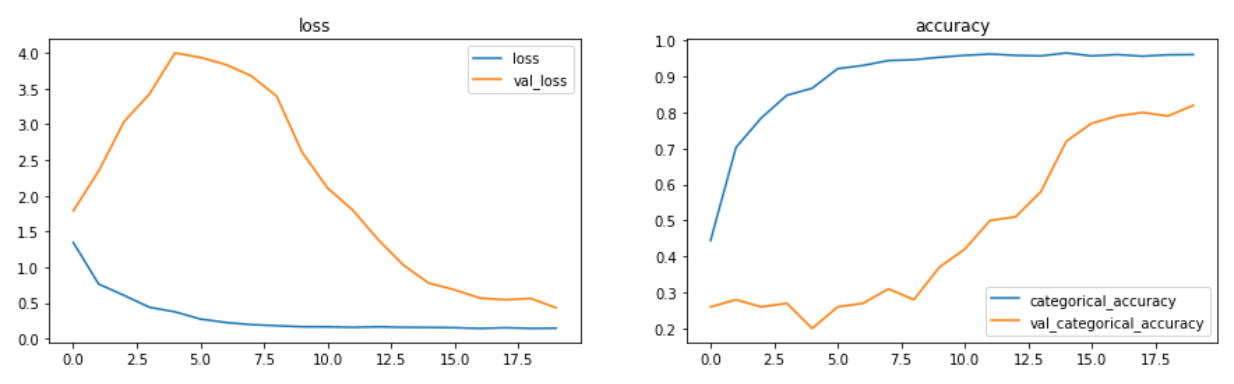

### Model 4

####  The Time distributed Conv2D+LSTM  model structure:
- 4 X TimeDistributed CONV2D + LSTM + FC layers. 
-   2D Convolution layers have increasing number of units (8,16,32,64). 1st and 2nd layer kernel size (3x3). 3rd       and 4th have kernel size (2x2)
-   Relu activation. 
-   Batch Normalization layer
-   Maxpooling2d layer of size (2x2)
- Time distributed Flatten Layer
- LSTM layer (256 units) with dropout (0.25)
- 1 Fully connected Dense layer (256 units) with relu activation +Dropout(0.25)
- Softmax output layer
- adam optimizer

#### Hyperparameters:
-  Resolution:160x160
-  frames:16
-  batch_size:20
-  epochs: 30


#### Results:
-    Training Loss:         0.105
-    Training accuracy:     97.81%
-    Validation Loss:       0.53
-    Validation accuracy:   82%
-    Model Size:            81 MB

##### Conclusions:  THE CONV2D+LSTM model gives slightly more overfitting results compared to the GRU for an increase in the model size. We would prefer GRU over LSTM

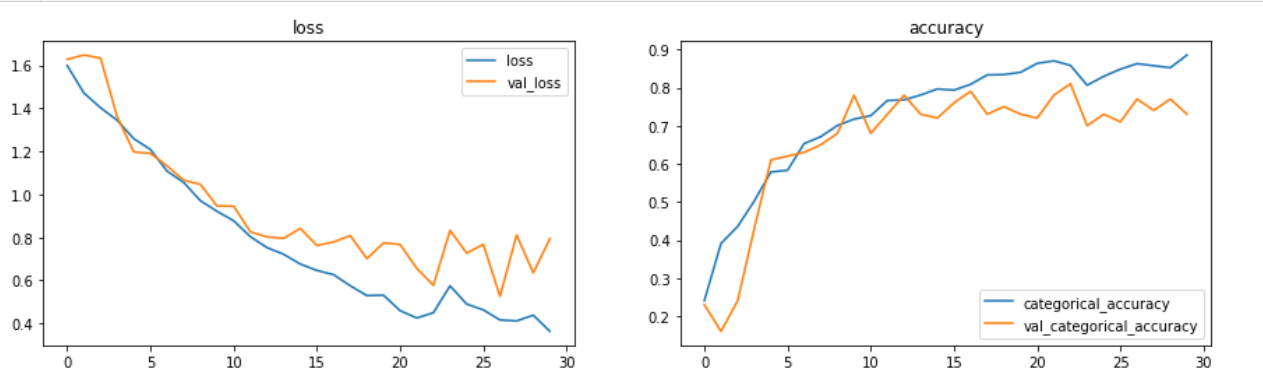

### Model 5

####  The Time distributed MobileNet (weights are trained) + LSTM model structure:
-   1 X TimeDistributed MobileNet (without output layer) + LSTM + FC layers. 
-   Batch Normalization layer
-   Maxpooling2d layer of size (2x2)
- Time distributed Flatten Layer to convert into 1d for input into lstm layer
- LSTM layer (256 units) with dropout (0.25)
- 1 Fully connected Dense layer (256 units) with rel activation +Dropout(0.25)
- Softmax output layer
- adam optimizer

#### Hyperparameters:
-  Resolution:160x160
-  frames:16
-  batch_size:5  batch size is reduced to prevent oom 
-  epochs: 20





#### Results:
-    Training Loss:         0.0733
-    Training accuracy:     97.81%
-    Validation Loss:       0.0507  # a remarkably low loss
-    Validation accuracy:   99%
-    Model Size:            91 MB

##### Conclusions:  The time distributed mobile net has a large file size but a remarkably high validation accuracy of 99% . The model has generalized pretty well and should perform well on unseen data as well.

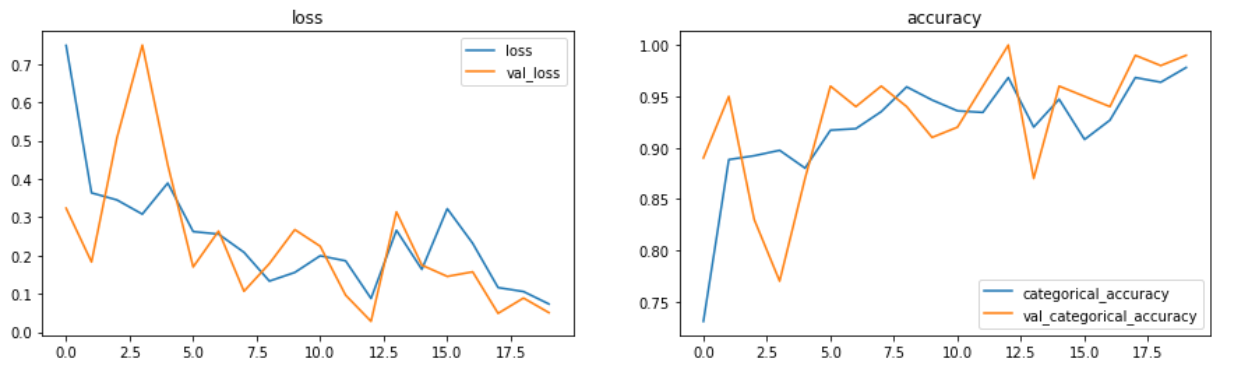

### Model 6

####  The Time distributed MobileNet (weights are trained) +GRU model structure:
-   1 X TimeDistributed MobileNet (without output layer) + GRU + FC layers. 
-   Batch Normalization layer
-   Maxpooling2d layer of size (2x2)
- Time distributed Flatten Layer to convert into 1d for input into lstm layer
- GRU layer (256 units) with dropout (0.25)
- 1 Fully connected Dense layer (256 units) with rel activation +Dropout(0.25)
- Softmax output layer
- adam optimizer

#### Hyperparameters:
-  Resolution:160x160
-  frames:16
-  batch_size:5  batch size is reduced to prevent oom 
-  epochs: 20





#### Results:
-    Training Loss:         0.018
-    Training accuracy:     99.47%
-    Validation Loss:       0.002  # a remarkably low loss
-    Validation accuracy:   100%
-    Model Size:            78 MB

##### Conclusions:  The time distributed mobile net  with GRU has a relatively smaller file size than mobilenet-LSTM and it is giving a very high accuracy model with no overfitting. The high validation score is due to the  small validation set; but it should perform reasonably well with unseen data.

#### Below is the table that summarizes all the model details

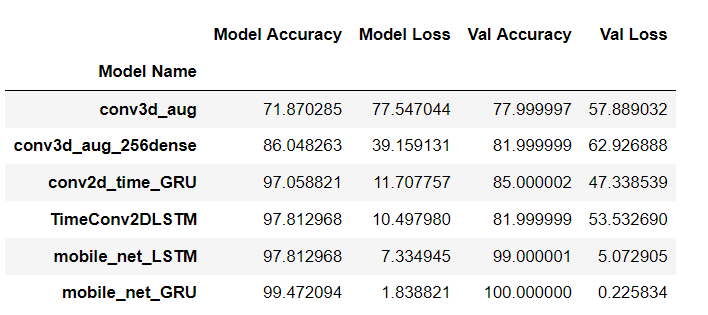

### Model 7(Final Model)   
- We will try to tweak our time distributed mobile-net+GRU to reduce the model size by reducing the GRU and dense layer units
####  (FINAL MODEL) The Time distributed MobileNet (weights are trained) +GRU model structure:  
-   1 X TimeDistributed MobileNet (without output layer) + GRU + FC layers. 
-   Batch Normalization layer
-   Maxpooling2d layer of size (2x2)
- Time distributed Flatten Layer to convert into 1d for input into lstm layer
- GRU layer (128 units) with dropout (0.25)
- 1 Fully connected Dense layer (128 units) with rel activation +Dropout(0.25)
- Softmax output layer
- adam optimizer

#### Hyperparameters:
-  Resolution:160x160
-  frames:20
-  batch_size:5  batch size is reduced to prevent oom 
-  epochs: 20





#### Results:
-    Training Loss:         0.036
-    Training accuracy:     98.94%
-    Validation Loss:       0.026  # a remarkably low loss
-    Validation accuracy:   99.0%
-    Model Size:            57 MB

##### Conclusions:  The final model uses the same architechture as before but with a significantly lower model size of 57 MB getting a very good accuracy with lesser model parameters. 


#### To test the model we can either adopt the following 2 methods
-    Run the model builder for the final model(given below); and then do the training from scratch and use it to predict.
-    Directly load the trained weights for the final model and use it 

### Model builder for the final model 

In [9]:
from keras.applications import mobilenet

mobilenet_transfer = mobilenet.MobileNet(weights='imagenet', include_top=False)
# for layer in mobilenet_transfer.layers[:-4]:
#     layer.trainable = False

class mobile_net_GRU(ModelBuilderMoreAugmentation):
    
    def define_model(self,GRU_cells=64,dense_neurons=64,dropout=0.25):
        
        model = Sequential()
        model.add(TimeDistributed(mobilenet_transfer,input_shape=(self.frames_to_sample,self.image_height,self.image_width,self.channels)))
 
        
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
        model.add(TimeDistributed(Flatten()))

        model.add(GRU(GRU_cells))
        model.add(Dropout(dropout))
        
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(Dropout(dropout))
        
        model.add(Dense(self.num_classes, activation='softmax'))
        
        
        optimiser = optimizers.Adam()
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        return model
    


####   use the following code only if you want to train from scratch

In [ ]:
rnn_cnn7=mobile_net_GRU()  # creates a object and inherits the objects of the superclass 
rnn_cnn7.initialize_path(project_folder)
rnn_cnn7.initialize_image_properties(image_height=160,image_width=160)  # best hyperparameters adjusted to my pc
rnn_cnn7.initialize_hyperparams(frames_to_sample=20,batch_size=5,num_epochs=20)
rnn_cnn7_model=rnn_cnn7.define_model(GRU_cells=128,dense_neurons=128,dropout=0.25)

print("Total Params:", rnn_cnn7_model.count_params())
history_mod8=rnn_cnn7.train_model(rnn_cnn7_model,augment_data=True)  # start training

### Use already trained model for prediction. The weights are provided.
- We will import the weights 

In [10]:
model = load_model('model-00020-0.03622-0.98944-0.02629-0.99000.h5')

### Testing our code on validation set
###### Please use the following hyperparameters for testing:  
-     image resolution  160X160
-     image frames      20
-     batch size         5

In [11]:
# generator one batch of validation images
test_generator=mobile_net_GRU()
# this object inherits the hyperparameter inititialization methods defined inside our super-class. This allows us to also use the generator method 
test_generator.initialize_path(project_folder)
test_generator.initialize_image_properties(image_height=160,image_width=160)
test_generator.initialize_hyperparams(frames_to_sample=20,batch_size=5,num_epochs=1)

g=test_generator.generator(test_generator.val_path,test_generator.val_doc,augment=False)
batch_data, batch_labels=next(g) # generator a batch to test

In [12]:
batch_labels    # these are the true labels

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [13]:
class_names={0:'Left_Swipe',1:'Right_Swipe',2:'Stop',3:'Thumbs Down',4:'Thumbs_Up'} # creating dictionary for predicting class labels

Text(0.5, 1.0, 'Stop')

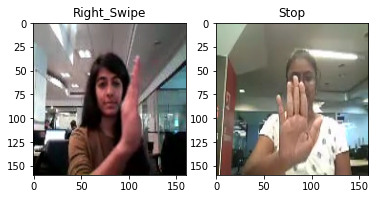

In [20]:
test1,test2=2,1   # enter which image you want to test 'starts from 0'


fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(batch_data[test1,12,:,:,:])  
axes[0].set_title(class_names[np.where(batch_labels[test1]==1)[0][0]])

axes[1].imshow(batch_data[test2,12,:,:,:])
axes[1].set_title(class_names[np.where(batch_labels[test2]==1)[0][0]])


#### Testing our predictions

In [21]:
results=np.argmax(model.predict(batch_data[:,:,:,:,:]),axis=1)

In [22]:
print(f'the predicted results for image 1 is {class_names[results[0]]} and for image 2 is {class_names[results[3]]}')

the predicted results for image 1 is Left_Swipe and for image 2 is Stop


###  Testing our model on completely unseen data
-  We can use any mp4 file and opencv code below to check the gesture 
-  We can use webcam for live forecasting

### open cv code for testing in webcam (tried to add some new features to the assignment) 


In [25]:
# to_predict = []
# classes = ['Left_Swipe','Right_Swipe','Stop','Thumbs Down','Thumbs_Up']   # creating classes for prediction as per data


In [ ]:

# num_frames = 0
# cap = cv2.VideoCapture(0)
# cap.set(12, 50)
# cap.set(6, 10)

# preds = []

# classe = ''
# import time 

# while(True):
#     # Capture frame-by-frame
#     ret, frame = cap.read()
#     if ret:    
        
#         frame_cp = frame

#         frame_cp = cv2.resize(frame_cp,(160,160))


#         to_predict.append(frame_cp)
#         to_predict.append(frame_cp)

#         predict = 0
#         if len(to_predict) == 20:

#             frame_to_predict = [[]]
#             frame_to_predict[0] = np.array(to_predict, dtype=np.float32)


#             predict = model.predict(np.array(frame_to_predict))
#             classe = classes[np.argmax(predict)]

#             if np.amax(predict) > 0.85:
#                 print('Class = ',classe, 'Precision = ', np.amax(predict)*100,'%')
#                 preds.append(np.argmax(predict))
#                 with open('gesture.pkl','wb') as f:
#                     pickle.dump(np.argmax(predict), f)
#             if len(preds) >= 10:
#                 preds = preds[8:9]

#             to_predict = []

#             font = cv2.FONT_HERSHEY_SIMPLEX
#         cv2.putText(frame, classe, (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0.5, 0.5),1,cv2.LINE_AA)

#         cv2.imshow('Hand Gesture Recognition',frame)
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

#####  Although our model has learnt the given small dataset very well, but we need to extract only the hand features using open CV and then train our model to generalize on random test data.

In [23]:
! pip freeze requirements.txt

absl-py==0.12.0
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
backcall==0.2.0
bleach @ file:///tmp/build/80754af9/bleach_1612211392645/work
cachetools==4.2.2
certifi==2021.5.30
cffi @ file:///C:/ci/cffi_1613247279197/work
chardet==4.0.0
click==8.0.1
colorama==0.4.4
cycler==0.10.0
decorator==4.4.2
defusedxml @ file:///tmp/build/80754af9/defusedxml_1615228127516/work
entrypoints==0.3
flatbuffers==1.12
gast==0.3.3
google-auth==1.30.1
google-auth-oauthlib==0.4.4
google-pasta==0.2.0
grpcio==1.32.0
h5py==2.10.0
idna==2.10
imageio==2.9.0
importlib-metadata @ file:///C:/ci/importlib-metadata_1617877484576/work
ipykernel==5.5.3
ipython==7.22.0
ipython-genutils==0.2.0
jedi==0.18.0
Jinja2 @ file:///tmp/build/80754af9/jinja2_1621238361758/work
joblib==1.0.1
jsonschema @ file:///tmp/build/80754af9/jsonschema_1602607155483/work
jup